<a href="https://colab.research.google.com/github/Toshi-M56/PIDcontrol/blob/main/%E5%B7%A5%E5%AD%A6%E5%AE%9F%E9%A8%93PID%E5%88%B6%E5%BE%A1%E5%AE%9F%E9%A8%93%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# アクチュエーターのPID制御　実験シミュレーション

ここでは，電気電子工学実験2テーマ５　アクチュエータのPID制御の実験についてシミュレーションをしていきます．  

ちなみにこのホームページは[Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb?hl=ja)と呼ばれるGoogleが提供するサービスで，  
Googleが提供するサーバを使って自由にPythonプログラムを記述・実行することができます．  
Webブラウザさえあればいいため，環境構築の手間がなく，  
PCのスペックが低くてもネット環境さえあれば本格的なPythonプログラムを作成して実行することができます．

## 使い方
まず初めに，このページの使い方を簡単に学んでいきましょう．
すぐ下に灰色の四角いボックス（セル）があると思います．
ここに，Pythonのプログラムを書いていきます．

すぐ下のセルをクリックして「Shiftを押しながらEnter」とキーボードを打ってみてください．


In [ ]:
x = 1
print(x)

「1」と表示されたと思います．

これで
*   xという変数に1を代入
*   xの中身を画面に表示

という二つの命令を実行するプログラムを動かしたことになります．

このように，非常に簡単にPythonを実行できるのがColaboratoryの便利なところです．

ちなみに，「#〜〜〜」でコメントアウトができます．

この部分はプログラムとして実行されないため，メモ書きとして利用できます．

以降のプログラムには，理解しやすいように時々メモ書きを残しておきますので，ご活用ください．

In [ ]:
# 2たす3を実行します
x = 2 + 3
print(x)

## シミュレーションの準備
プログラムが書けると，コンピューターに様々な処理を実行させることができます．しかし，膨大なプログラムの全ての処理を自分で書くのは大変です．そこで，ライブラリというすでに出来上がったプログラムを導入すると効率よくプログラムを作れます．

下のセルを実行してください．

「!pip 〜〜〜」という部分では，ライブラリをダウンロードし，

「import XXXXX as xx」という部分では，XXXXXというライブラリをxxという短い名前で使えるように導入しています．

細かいところは，今日は気にしないで大丈夫です．

In [1]:
!pip install control
!pip install japanize_matplotlib
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
import japanize_matplotlib
plt.style.use('bmh')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 2.2 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=d7772aeaaef1c510b6f4d50267ba6c90d9c2f8aa3176cd004b08f912badf2c7e
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 2.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=edeadd901961f19eb169e729a49d5a8941c50cf18a98df4d662a58807b5b207a
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


これで，

*   numpy (np) : 数値計算のためのライブラリ
*   matlab  : 制御に関するライブラリ
*   pyplot (plt) : グラフ表示に関するライブラリ
*   japanize_matplotlib (グラフに日本語を使うためのもの)

というライブラリを導入することができました．．


それでは早速matlab.tf()を使って以下のような伝達関数モデルを作りましょう．
$$ \frac{2}{s + 3} $$
以下を実行してください．

In [2]:
# ()内の[2]とか[1, 3]は，伝達関数の分子と分母の係数を意味しています．
G = matlab.tf([2], [1, 3]) 
print(G)


  2
-----
s + 3



このように，Gという変数に
$$\frac{2}{s+3}$$
という伝達関数を代入することができました．

そして，この関数のステップ応答を調べるには次のように実行します．

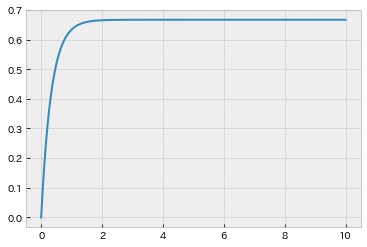

In [3]:
# 0から5までを1000個刻みに分割した数列をtに代入．
# つまり0sから5sまでの時間．気になる人は人はprint(t)してみてください．
t = np.linspace(0, 10, 1000) 

# matlab.step()はステップ応答を求める関数．()の中には伝達関数Gと時間の数列tを入れます．
# すると，制御量(yout)と時間(T)が得られます．(Tはtと同じです)
yout, T = matlab.step(G, t) 

# plt.plot()はグラフをプロットします．
# ()の中にはx軸の値とy軸の値が入ります．ここではTとyoutですね．
plt.plot(T, yout)  
plt.show() #plt.show()でグラフを画面に表示します．

一連のコードをまとめると以下のようになります．
色々な伝達関数のステップ応答を試してみてもいいかもしれません．


      6
-------------
s^2 + 2 s + 6



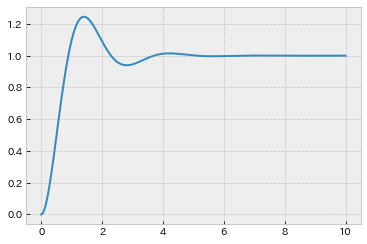

In [4]:
numerator = [6] # 分子
denominator = [1, 2, 6] # 分母
G = matlab.tf(numerator, denominator) 
print(G)
t = np.linspace(0, 10, 1000) 
yout, T = matlab.step(G, t) 
plt.plot(T, yout)  
plt.show() 

さて，このように伝達関数Gからステップ応答を求め，グラフを描写する処理を何度も書くのも面倒なので，

関数にまとめてしまいましょう．
そこで，次のようなplot_step_response()という関数を作りました．

**この関数を定義するために一度下のセルを実行しておいてください．**

この関数は()の中に伝達関数Gを入れるだけで，ステップ応答をグラフにしてくれます．
追加機能としてP制御とD制御の操作量をプロットできるようにしています．

興味がある人は中身を読んでみてください．

In [5]:
def plot_step_response(G, control=None, time=5, n_step=1000):
    t = np.linspace(0, time, n_step) #時間の数列を作る time秒間を n_step分割で
    yout, T = matlab.step(G, t)  # ステップ応答を求める
    d_yout = (yout[1:] - yout[:-1])/(time/n_step) #位置の情報youtから 速度の情報情報d_youtを求める

    fig = plt.figure(figsize=(6,6)) # figureを生成
    ax = fig.add_subplot(211) # figureにsubplot(ax)を追加
    ax.plot(T, yout, c="blue", label="位置") # axにyout(位置)をプロット
    ax.legend(loc="upper right") # 凡例を表示する
    ax.axhline(1, color="black", linestyle="--") # 目標値を示す水平線をプロット
    ax.set_ylabel("位置", fontsize=20) # 位置の軸ラベルを表示する
    ax_v = ax.twinx() # 右側に速度グラフ用の軸を設けて subplot(ax_v)を重ねて追加
    ax_v.plot(T[1:], d_yout, c="r", label="速度") # d_yout(速度)をプロット
    ax_v.axhline(0, color="black", linestyle=":") # 速度0を示す水平線をプロット
    ax_v.set_ylabel("速度", fontsize=20) # 速度の軸ラベルを右の軸に表示
    ax_v.legend(loc="lower right") # 速度グラフの凡例を表示

    # ifの中は　P制御，PD制御の場合に操作量をプロットするためのもの．
    if control == "P" or control == "PD":
        ax2 = fig.add_subplot(212) # 新たなsubplot(ax2)を追加
        p_mvalue = (1-yout)*Kp # P制御の操作量を求める
        ax2.plot(T,p_mvalue, c="blueviolet", label="P制御") # P制御の操作量をプロット
        if control == "PD": # もしPD制御だったら
            d_mvalue = -d_yout*Kd # D制御の操作量を求める
            ax2.plot(T[:-1],d_mvalue, c="orange", label="D制御") # D制御の操作量をプロット
            ax2.plot(T[:-1],p_mvalue[:-1] + d_mvalue, c="green", label="PD制御") #PD制御の操作量をプロット
        ax2.axhline(0, color="black", linestyle="--") # 操作量0を示す水平線をプロット
        ax2.set_ylabel("操作量", fontsize=20) # 操作量の軸ラベルを表示
        ax2.legend() # 凡例を表示する
        ax2.set_xlabel("時間[s]", fontsize=20) # 横軸に時間の軸ラベルを表示
    plt.show() # 作成したグラフを表示

## P制御のシミュレーション
それではさっそくP制御のシミュレーションを実行していきましょう．

実験テキストのモデル式から導き出した制御対象の伝達関数は
$$P(s)=\frac{7}{s^2}$$
でした．
ここに，P制御
$$C(s)=K_p$$
をかけて閉ループ伝達関数を求めると
$$\frac{C(s)P(s)}{1+C(s)P(s)}=\frac{7K_p}{s^2 + 7K_p}$$
となるのでした．そこでひとまず
$$K_p=0.2$$
とし，この伝達関数のステップ応答を求めてみます．

伝達関数G(s)  
   1.4
---------
s^2 + 1.4



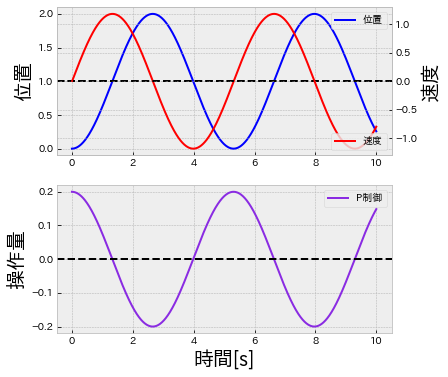

In [6]:
Kp = 0.2
G = matlab.tf([7*Kp], [1, 0, 7*Kp])
print("伝達関数G(s) ", G)

plot_step_response(G, control="P", time=10)



グラフが表示されたと思います．それぞれ

青：位置，　赤：速度，　黒：目標位置　紫：P制御の操作量

となっています．
グラフから気がつくことはありますか？

次の点についてグラフを観察しながら考えてみてください．

*   位置とP制御の操作量の関係
*   波形の周期ととKpの関係
*   位置と速度の関係
*   なぜ鋼球は止まらないのか，操作量の観点から考えてみる．

また，Kpの値を0.2, 0.4, 0.6, 0.8, 1.0と変えていくと何が起きますか？



##PD制御のシミュレーション
次に，PD制御のシミュレーションを実行していきましょう．

制御対象に，PD制御
$$C(s)=K_p + K_ds$$
をかけて閉ループ伝達関数を求めると
$$\frac{C(s)P(s)}{1+C(s)P(s)}=\frac{7K_ds + 7K_p}{s^2 + 7K_ds + 7K_p}$$
となるのでした．そこでひとまず
$$K_p=0.4, K_d=0.1$$
とし，この伝達関数のステップ応答を求めてみます．

伝達関数G(s)  
   1.4 s + 2.8
-----------------
s^2 + 1.4 s + 2.8



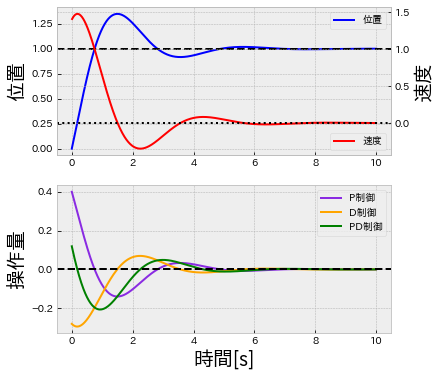

In [7]:
Kp = 0.4
Kd = 0.2
G = matlab.tf([7*Kd, 7*Kp], [1, 7*Kd, 7*Kp])
print("伝達関数G(s) ", G)

plot_step_response(G, control="PD", time=10)

グラフが表示されたと思います．それぞれ

青：位置，　赤：速度，　黒：目標位置　紫：P制御の操作量，　橙：D制御の操作量，　緑：PD制御の操作量

となっています．
グラフから気がつくことはありますか？

次の点についてグラフを観察しながら考えてみてください．

*   位置とP制御の操作量の関係
*   速度とD制御の操作量の関係
*   P制御，D制御，PD制御それぞれの関係
*   ステップ応答が振動しなくなる時（振動限界）の条件はなんですか？
*   $K_P=0.4$の時振動限界を迎えるを迎える$K_D$の値を値をPythonで求めてみましょう．

また，Kdの値を0.1, 0.2, 0.3, 0.4, 0.478, 0.5, 0.6と変えていくと何が起きますか？